In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Google-Playstore.csv', encoding='ISO-8859-1')

Saving Google-Playstore.csv to Google-Playstore.csv


In [ ]:
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident IrÃ©nÃ©e NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,å¤§ä¿ å®¢âç±è¡æ­¸ä¾,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [ ]:
df.head()           # 데이터 구조 확인
df.info()           # 데이터 타입, 결측치 개수 확인
df.describe()       # 숫자형 데이터의 통계 요약
df.isnull().sum()   # 컬럼별 결측치 개수 상세 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

,0
App Name,5
App Id,0
Category,0
Rating,22883
Rating Count,22883
Installs,107
Minimum Installs,107
Maximum Installs,0
Free,0
Price,0


In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

# 전처리(결측치 처리)

In [ ]:
#Installs 전처리
# '1,000+' → '1000' 식으로 변환하여 정수로 바꿈

df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

print("Installs 전처리 완료:")
print(df['Installs'].head())

Installs 전처리 완료:
0      10.0
1    5000.0
2      50.0
3      10.0
4     100.0
Name: Installs, dtype: float64


In [ ]:
# Size 전처리
# '10M', '3.4k' → KB 단위로 통일하여 숫자로 변환
# 'Varies with device'는 NaN으로 처리
# 문자열을 숫자형 KB로 바꾸는 함수
# replace() 함수로 M, k 같은 단위를 제거하고, 숫자로 변환한 후
# 메가(M)는 1024를 곱해 KB로 통일

def convert_size(size_str):
    if pd.isna(size_str):
        return np.nan  # 결측치는 그대로 유지
    size_str = size_str.replace(',', '')  # 쉼표 제거

    if 'M' in size_str:
        return float(size_str.replace('M', '')) * 1024  # MB → KB
    elif 'k' in size_str:
        return float(size_str.replace('k', ''))  # KB 그대로
    else:
        return np.nan  # 그 외 특수값 처리

# 참고: df['Size_MB'] = df['Size_MB'] / 1024  # 다시 MB로

# 'Varies with device' 같은 값은 NaN으로 대체
df['Size_MB'] = df['Size'].replace('Varies with device', np.nan)

# 위에서 만든 함수로 변환
df['Size_MB'] = df['Size_MB'].apply(convert_size)

print("Size_MB 전처리 완료:")
print(df[['Size', 'Size_MB']].head())

Size_MB 전처리 완료:
   Size  Size_MB
0   10M  10240.0
1  2.9M   2969.6
2  3.7M   3788.8
3  1.8M   1843.2
4  6.2M   6348.8


In [ ]:
# 날짜 전처리 및 파생 변수 생성
# 앱의 마지막 업데이트일로부터 며칠이 지났는지 계산

# Last Updated 컬럼을 datetime 형식으로 변환
# 문자열 상태인 날짜("Feb 26, 2020" 등)를 datetime 객체로 변환
# errors='coerce'는 변환 실패 시 자동으로 NaT (결측값) 처리
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Scraped Time 컬럼도 datetime 형식으로 변환
# 이 컬럼은 앱 데이터를 스크래핑한 시점(= 현재 기준 날짜)
# 앱이 마지막으로 언제 업데이트되었는지 비교하기 위한 기준점
df['Scraped Time'] = pd.to_datetime(df['Scraped Time'], errors='coerce')


# 마지막 업데이트일로부터 며칠이 지났는지 계산
# datetime - datetime → timedelta 객체가 나오고
#.dt.days를 붙이면 정수형 일수(int)로 변환
# 숫자가 작을수록 최근에 업데이트된 앱임
df['Days Since Last Update'] = (df['Scraped Time'] - df['Last Updated']).dt.days

print("날짜 처리 완료 (Days Since Last Update 생성):")
print(df[['Last Updated', 'Scraped Time', 'Days Since Last Update']].head())

날짜 처리 완료 (Days Since Last Update 생성):
  Last Updated        Scraped Time  Days Since Last Update
0   2020-02-26 2021-06-15 20:19:35                     475
1   2021-05-06 2021-06-15 20:19:35                      40
2   2019-08-19 2021-06-15 20:19:35                     666
3   2018-10-13 2021-06-15 20:19:35                     976
4   2018-11-12 2021-06-15 20:19:35                     946


In [ ]:
# 평점 결측치 처리
# 평점 0.0은 결측치로 간주하고 평균값으로 대체

# 0.0을 NaN으로 바꾸기
# 0.0은 실평점이 아니라 아직 평점이 없을 경우 많음
df['Rating'] = df['Rating'].replace(0.0, np.nan)

#  평균값으로 결측치 채우기
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

print("평점 결측치 처리 완료 (평균 대체):")
print(df['Rating'].describe())

평점 결측치 처리 완료 (평균 대체):
count    2.312944e+06
mean     4.100915e+00
std      5.025808e-01
min      1.000000e+00
25%      4.100915e+00
50%      4.100915e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64


In [ ]:
# 상위 10% 기준으로 인기 앱 정의

# 1. 상위 10% (90th percentile) 설치 수 기준 구하기
threshold_90 = df['Maximum Installs'].quantile(0.90)

# 2. 기준 이상이면 인기 앱(1), 아니면 비인기 앱(0)으로 이진 변수 생성
df['Is_Popular'] = np.where(df['Maximum Installs'] >= threshold_90, 1, 0)

# 3. 기준 출력 및 결과 분포 확인
print(f"상위 10% 기준 설치 수 (cutoff): {threshold_90:,.0f}")
print(df['Is_Popular'].value_counts())

상위 10% 기준 설치 수 (cutoff): 63,988
Is_Popular
0    2081648
1     231296
Name: count, dtype: int64


In [ ]:
# 불필요한 열 제거
# 제거할 열 리스트 정의
drop_cols = ['Developer Website', 'Developer Email', 'Privacy Policy']

# 열 제거 수행
df = df.drop(columns=drop_cols)

# 이상치 처리

*remove_outliers_iqr() 함수 주어진 컬럼에 대해 1사분위수(Q1), 3사분위수(Q3), IQR을 계산

이상치 기준 범위를 벗어난 값들을 필터링

제거 전/후 개수 차이를 출력

해당 컬럼의 boxplot을 그려 분포와 이상치를 시각적으로 확인

*반복 적용 (for col in [...])

주요 수치형 컬럼 4개에 대해 위 함수를 반복 적용

이상치 제거된 새로운 DataFrame df_clean이 최종 결과

[Rating] 이상치 범위: 3.80 ~ 4.60
→ 제거 전: 2312944개 / 제거 후: 1609720개 / 제거된 행 수: 703224개



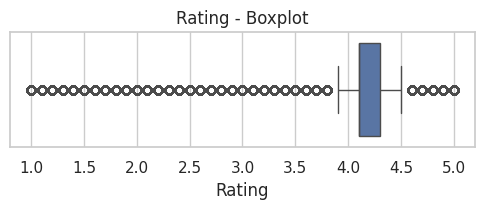

[Rating Count] 이상치 범위: -24.00 ~ 40.00
→ 제거 전: 1609720개 / 제거 후: 1292898개 / 제거된 행 수: 316822개



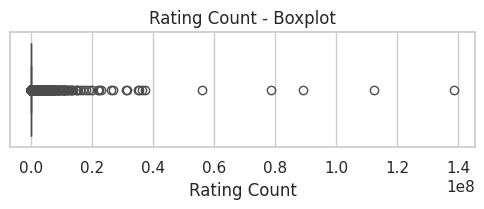

[Size_MB] 이상치 범위: -23296.00 ~ 51660.80
→ 제거 전: 1292898개 / 제거 후: 1181495개 / 제거된 행 수: 111403개



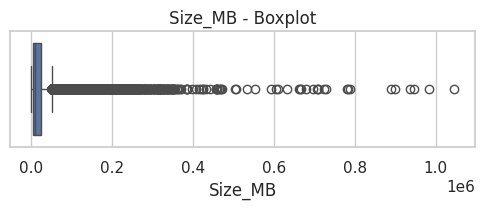

[Price] 이상치 범위: 0.00 ~ 0.00
→ 제거 전: 1181495개 / 제거 후: 1160118개 / 제거된 행 수: 21377개



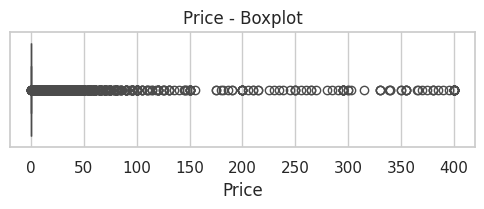

이상치 제거 완료 후 데이터: (1160118, 24)


In [ ]:
# 시각화 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid")

# 이상치 제거 함수 정의
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"[{column}] 이상치 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")
    before = len(df)
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = len(df_filtered)
    print(f"→ 제거 전: {before}개 / 제거 후: {after}개 / 제거된 행 수: {before - after}개\n")

    # Boxplot 시각화
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[column])
    plt.title(f"{column} - Boxplot")
    plt.show()

    return df_filtered

# 복사본 생성
df_clean = df.copy()

# 이상치 제거 적용
for col in ['Rating', 'Rating Count', 'Size_MB', 'Price']:
    df_clean = remove_outliers_iqr(df_clean, col)

# 결과 확인
print("이상치 제거 완료 후 데이터:", df_clean.shape)

# Feature Engineering

In [ ]:
# 가설 1: 성공한 앱은 업데이트 주기가 더 짧고, 출시 이후 일정 시간이 지난 앱이다.
# Feature 1: update_interval_days (업데이트 주기)
# 날짜 타입으로 변환
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')
# 업데이트 주기 계산 (수집일자 기준: Scraped Time이 있다면 활용)
df['update_interval_days'] = (df['Scraped Time'] - df['Last Updated']).dt.days

#Feature 2: lifetime_days (출시 후 경과일)
df['lifetime_days'] = (df['Scraped Time'] - df['Released']).dt.days

In [ ]:
# 가설 2: 성공한 앱은 무료이며, 광고 또는 인앱 결제를 통한 수익화 구조를 가진다.
# Feature 3: monetization_type (수익화 유형)
def monetization(row):
    if row['Free']:
        if row['Ad Supported'] and row['In App Purchases']:
            return 'Ads + IAP'
        elif row['Ad Supported']:
            return 'Ads only'
        elif row['In App Purchases']:
            return 'IAP only'
        else:
            return 'Free no monetization'
    else:
        return 'Paid'

df['monetization_type'] = df.apply(monetization, axis=1)

In [ ]:
# 가설 3: 성공한 앱은 특정 카테고리에 집중되어 있다.
# Feature 4: category_group
# 카테고리별 평균 설치 수 기반 상위 그룹 설정
top_categories = df.groupby('Category')['Maximum Installs'].mean().sort_values(ascending=False).head(10).index
df['category_group'] = df['Category'].apply(lambda x: x if x in top_categories else 'Other')

# 시각화

<Axes: xlabel='Is_Popular', ylabel='update_interval_days'>

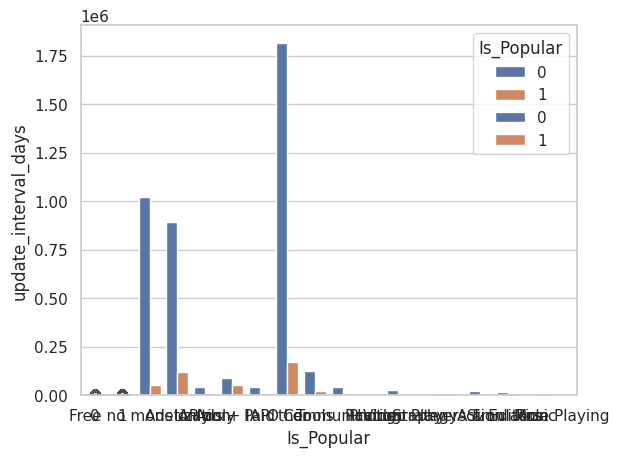

In [ ]:
sns.boxplot(data=df, x='Is_Popular', y='update_interval_days')
sns.boxplot(data=df, x='Is_Popular', y='lifetime_days')
sns.countplot(data=df, x='monetization_type', hue='Is_Popular')
sns.countplot(data=df, x='category_group', hue='Is_Popular')

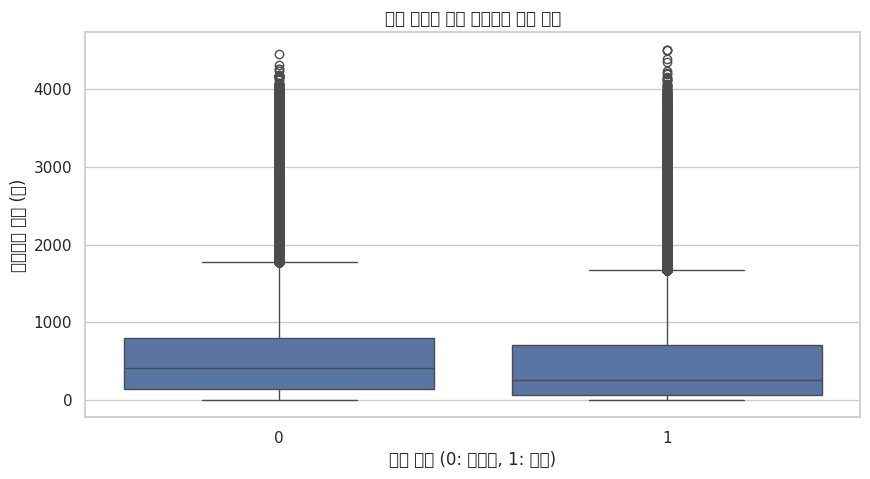

In [ ]:
# 업데이트 주기 박스플롯
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Is_Popular', y='update_interval_days')
plt.title('성공 여부에 따른 업데이트 주기 분포')
plt.xlabel('성공 여부 (0: 비성공, 1: 성공)')
plt.ylabel('업데이트 주기 (일)')
plt.show()

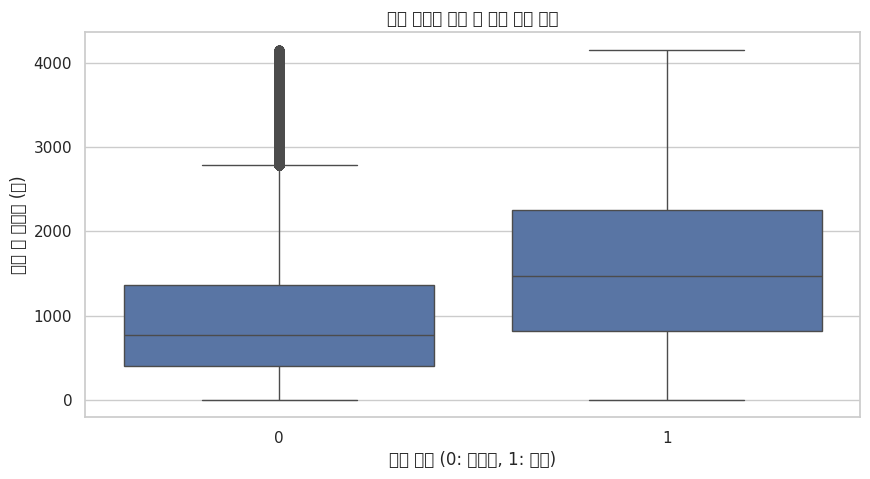

In [ ]:
# 앱 생존 기간 박스플롯
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Is_Popular', y='lifetime_days')
plt.title('성공 여부에 따른 앱 생존 기간 분포')
plt.xlabel('성공 여부 (0: 비성공, 1: 성공)')
plt.ylabel('출시 후 경과일 (일)')
plt.show()

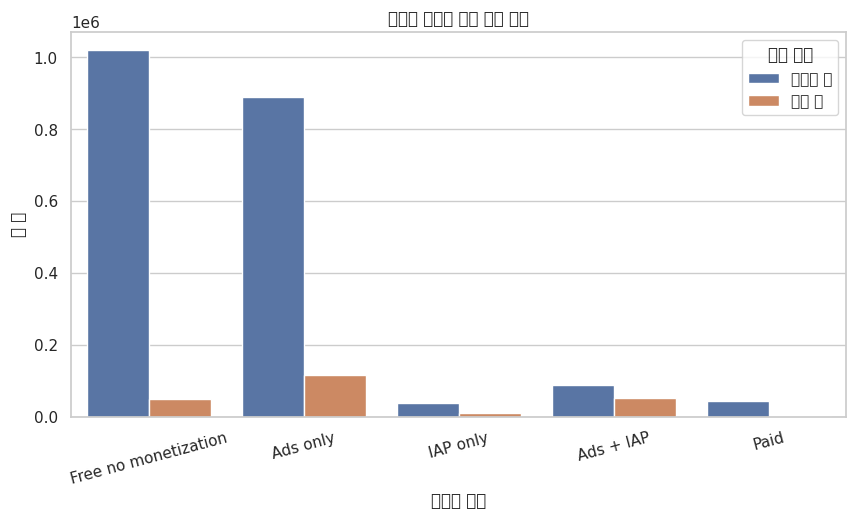

In [ ]:
# 수익화 방식별 성공 여부
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='monetization_type', hue='Is_Popular')
plt.title('수익화 방식별 성공 여부 분포')
plt.xlabel('수익화 방식')
plt.ylabel('앱 수')
plt.legend(title='성공 여부', labels=['비성공 앱', '성공 앱'])
plt.xticks(rotation=15)
plt.show()

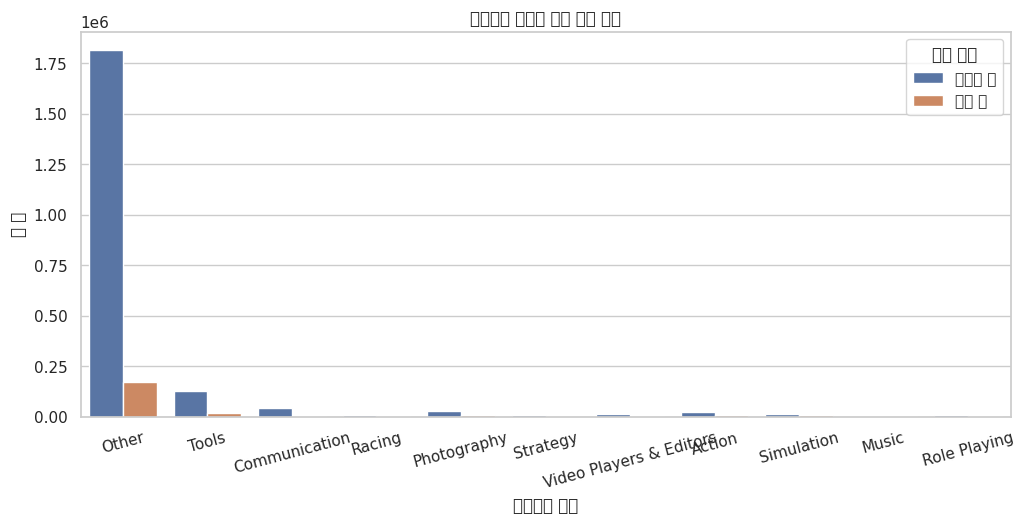

In [ ]:
# 카테고리 그룹별 성공 여부
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='category_group', hue='Is_Popular')
plt.title('카테고리 그룹별 성공 여부 분포')
plt.xlabel('카테고리 그룹')
plt.ylabel('앱 수')
plt.legend(title='성공 여부', labels=['비성공 앱', '성공 앱'])
plt.xticks(rotation=15)
plt.show()

In [ ]:
df.to_csv('df_processed.csv', index=False)